In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory data analysis

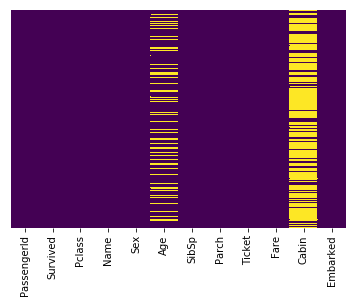

In [4]:
sns.heatmap(train.isnull(),cbar=False,cmap = 'viridis',yticklabels=False)

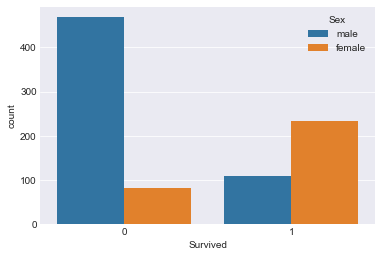

In [5]:
sns.set_style('darkgrid')
sns.countplot(data = train,x='Survived',hue = 'Sex')

### Here we can see that the number of female survived is more when compared to that of the female

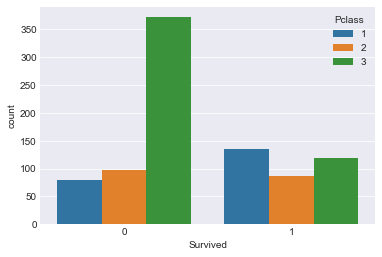

In [6]:
sns.countplot(x = 'Survived',data=train,hue='Pclass')

## In the above count plot we can see that the passengers in the first class have survived more

C:\Users\hcl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


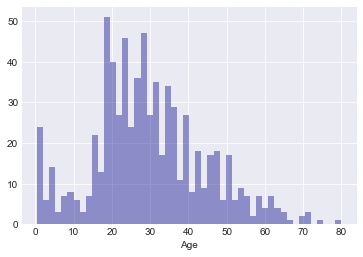

In [7]:
sns.distplot(train['Age'].dropna(),kde = False,bins= 50,color = 'darkblue')

###  Distribution of age across the data set. 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


C:\Users\hcl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


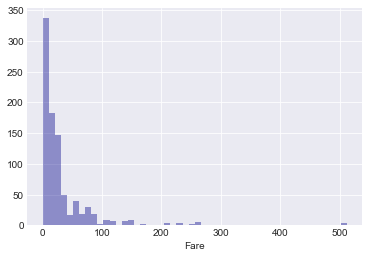

In [9]:
sns.distplot(train['Fare'],kde = False,color = 'darkblue')

C:\Users\hcl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


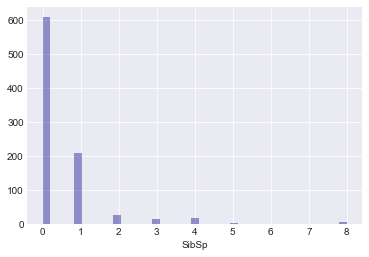

In [10]:
sns.distplot(train['SibSp'],kde = False,color = 'darkblue',label= 'Distribution of sibling count')

### Data cleaning 

#### we can see that age being an important factor contains some NA values. Hence this can be processed by filling the mean ages of according to the passenger class

In [11]:
mean_age = train[['Pclass','Age']].groupby('Pclass').mean()
mean_age

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [12]:

def clean_age(data2clean):
    
    pclass = data2clean[0];age = data2clean[1]
    if pd.isnull(age):
        if pclass == 1:
            return mean_age.loc[1]['Age']
        elif pclass == 2:
            return mean_age.loc[2]['Age']
        else:
            return mean_age.loc[3]['Age']
    else:
        return age
    

In [13]:
train['Age'] = train[['Pclass','Age']].apply(clean_age,axis = 1)

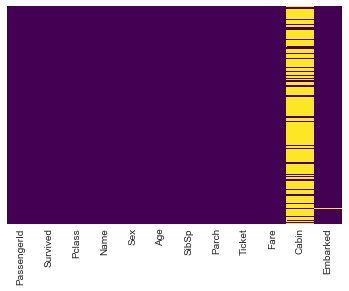

In [14]:
sns.heatmap(train.isnull(),yticklabels= False,cbar = False,cmap = 'viridis')

#### Cabin column has too much missing values and leads to distortion even if it is cleaned.Hence it is better to drop the column

In [15]:
train.drop('Cabin',axis=1,inplace= True)

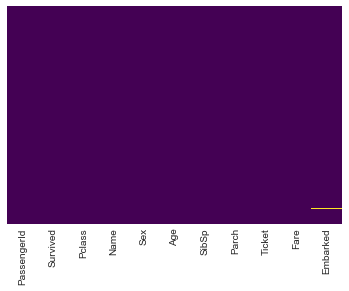

In [16]:
sns.heatmap(train.isnull(),yticklabels= False,cbar = False,cmap = 'viridis')

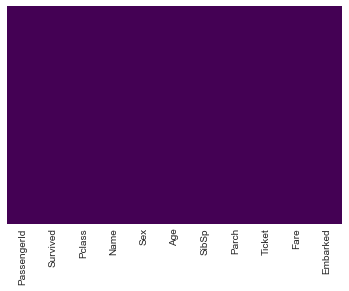

In [17]:
train.dropna(inplace=True)
sns.heatmap(train.isnull(),yticklabels= False,cbar = False,cmap = 'viridis')

### Converting categorical values

In [18]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [19]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Here we can see that the name column is not very much essential for the prediction hence the column can be dropped and the sex and the embarked column that was processed can be concatenated to the dataset after dropping the original columns of age and embarked 

In [21]:
train.drop(['Name','Sex','Ticket','Embarked','PassengerId'],axis=1,inplace= True)

In [22]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [23]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis = 1),train['Survived'],test_size = 0.30,random_state = 101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()

In [28]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
predictions = logmodel.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]


In [32]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267

